In [53]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
import tensorflow as tf
import pandas as pd

In [54]:
teste = pd.read_csv("datasets/Classification/Corona_NLP_test.csv")
treino = pd.read_csv("datasets/Classification/Corona_NLP_train.csv",encoding='latin-1')

data = pd.concat([teste,treino])
data = data.sample(frac=0.1, random_state=42)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4496 entries, 29256 to 6491
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       4496 non-null   int64 
 1   ScreenName     4496 non-null   int64 
 2   Location       3571 non-null   object
 3   TweetAt        4496 non-null   object
 4   OriginalTweet  4496 non-null   object
 5   Sentiment      4496 non-null   object
dtypes: int64(2), object(4)
memory usage: 245.9+ KB


In [55]:
data = data.drop(columns=[ "UserName","ScreenName","Location","TweetAt"], axis=1)

In [56]:
def categorize_sentiment(score):
    if score == 'Negative':
        return "Negative"
    elif score == 'Extremely Negative':
        return "Negative"
    elif score == 'Positive':
        return "Positive"
    elif score == 'Extremely Positive':
        return "Positive"
    else:
        return "Neutral"
    
    
data['Sentiment'] = data['Sentiment'].apply(categorize_sentiment)

In [57]:
# Fazer TOKENIZACAO das palavras

import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def get_all_str(tweet):
    sentence = ''
    for words in tweet:
        sentence += words
    sentence = sentence.lower()
    return sentence
def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

def get_hashtag(text):
    result = nltk.RegexpTokenizer(r'(?<=#)\w+').tokenize(text.lower())
    return result

def get_mention(text):
    result = nltk.RegexpTokenizer(r'(?<=@)\w+').tokenize(text.lower())
    return result 

def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

def remove_stopword(stopwords, lst):    
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

def pos_remove_noun(tagged):
    remove_noun = [word for word,pos in tagged if pos not in ['NN','NNS','NNP','NNPS']]
    txt = ''
    for i in range(len(remove_noun)):
        txt += remove_noun[i]
        txt += '\n'
    return cleanwordlist

def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
#     txt= ' '.join(tokens)
    return tokens

In [59]:
def preprocessing(text):
    words = get_word(text)
    lemma = lemmatization(words)
    removed = remove_stopword(['http','ly'],lemma)
    return removed

data['OriginalTweet'] = data['OriginalTweet'].apply(preprocessing)
data['OriginalTweet'] = data['OriginalTweet'].apply(get_str)

In [60]:
X = data.drop(columns=["Sentiment"])
y = data["Sentiment"]

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


Tfidf = TfidfVectorizer(stop_words='english', norm='l2' )
X = Tfidf.fit_transform(X["OriginalTweet"]).toarray()


In [62]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [63]:
from keras.utils import to_categorical
y = to_categorical(y)

In [64]:
y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [65]:
# Load the Boston Housing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
# # Scale the data

# scaler = StandardScaler(with_mean=False)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [69]:
# Build the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [71]:
#Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1,)


Epoch 1/100
197/197 [==============================] - 7s 29ms/step - loss: 0.9617 - accuracy: 0.5288 - val_loss: 0.8217 - val_accuracy: 0.6212
Epoch 2/100
197/197 [==============================] - 6s 31ms/step - loss: 0.3205 - accuracy: 0.8958 - val_loss: 0.8682 - val_accuracy: 0.6649
Epoch 3/100
197/197 [==============================] - 6s 32ms/step - loss: 0.0315 - accuracy: 0.9943 - val_loss: 0.9949 - val_accuracy: 0.6538
Epoch 4/100
197/197 [==============================] - 6s 31ms/step - loss: 0.0047 - accuracy: 0.9997 - val_loss: 1.0616 - val_accuracy: 0.6635
Epoch 5/100
197/197 [==============================] - 6s 30ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.1171 - val_accuracy: 0.6657
Epoch 6/100
197/197 [==============================] - 6s 30ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.1646 - val_accuracy: 0.6664
Epoch 7/100
197/197 [==============================] - 6s 29ms/step - loss: 6.4597e-04 - accuracy: 1.0000 - val_loss: 1.2034 - val_accur

KeyboardInterrupt: 

In [ ]:

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error: {mse}")

43/43 [==============================] - 1s 11ms/step - loss: 153.9129 - accuracy: 0.5619
Mean Squared Error: [153.91285705566406, 0.5618976950645447]


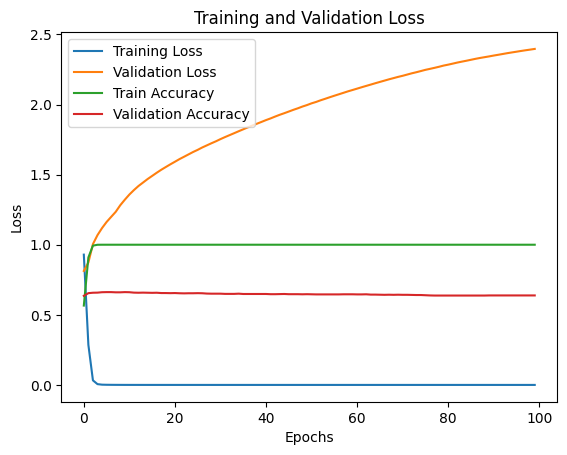

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
X_new = X_test[5:10]
y_preds = model.predict(X_new)
y_preds.round(2)

1/1 [==============================] - 0s 249ms/step


array([[0.  , 0.  , 1.  ],
       [0.  , 0.06, 0.94],
       [0.98, 0.02, 0.  ],
       [0.  , 0.02, 0.98],
       [0.2 , 0.  , 0.8 ]], dtype=float32)

In [ ]:
X_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test[5:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)